In [4]:
sample = open("D:\系统生物学项目\BioNLP\litcovid.pubtator.pmc.sample.txt") #本次处理的文章
# sample = open("D:/系统生物学项目/BioNLP/新开始/xx48478") #本次处理的文章
line = sample.readlines() #得到每一行为一个元素，构成一个列表，存储在line变量里
# line.pop(0)

In [5]:
title = line[0] #标题
article = line[1] #文章内容
title = title.split('|')[2] #去掉前缀
title = title.split('\n')[0] #去掉换行符
article = article.split('|')[2] #去掉前缀
title

'Critical illness-associated cerebral microbleeds in severe COVID-19 infection '

In [6]:
l_len = len(line) #这个文件总共的行数
t = [title] #得到标题的句子
sentence = article.split('. ') #用句号分割文章，构成列表，列表中的元素不含句号
sentences = t + sentence #标题和文章中所有的句子拼起来，因为给出的实体位置里包含了标题
s_len = len(sentences) #一共有多少个句子

In [7]:
#这个小节最终想要得到的是entity，一个列表，第一列是句子，后面对应的是句子里的实体
j = 2
ae_len_now = 0 #句子结尾的长度
entity = [] #存放句子及其中的实体
end = 0
for i in range(0,s_len):
    print(sentences[i])
    if i == 0:
        s_len_now=len(sentences[i])
        as_len_now =  ae_len_now #句子开始的长度
    else:
        s_len_now = len(sentences[i])+2 #现在遍历到的这个句子的长度，+1是加上句号的长度
        as_len_now =  ae_len_now #句子开始的长度
    print('我是句子开始的长度',as_len_now)
    ae_len_now = ae_len_now + s_len_now #句子结尾的长度
    print('我是句子结束的长度',ae_len_now)
    entity.append([])
    print('我是第几个句子',i)
    while j<l_len:
        print('我是第几行实体',j)
        start = int(line[j].split('\t')[1]) #得到第j行第2列的数字
        print('我是实体的起始位置',start)
        end = int(line[j].split('\t')[2]) #得到第j行第3列的数字
        print('我是实体的终止位置',end)
        if start>=as_len_now and end<=ae_len_now: #这个词在开头结尾中间，说明在这个句子中
            if entity[i] == []:
                entity[i].append(sentences[i]) #使第一列为句子内容
            entity[i].append(line[j].split('\t')[3])
            print(line[j].split('\t')[3])
            j = j+1
        else:
            break


Critical illness-associated cerebral microbleeds in severe COVID-19 infection 
我是句子开始的长度 0
我是句子结束的长度 78
我是第几个句子 0
我是第几行实体 2
我是实体的起始位置 0
我是实体的终止位置 16
Critical illness
我是第几行实体 3
我是实体的起始位置 59
我是实体的终止位置 67
COVID-19
我是第几行实体 4
我是实体的起始位置 68
我是实体的终止位置 77
infection
我是第几行实体 5
我是实体的起始位置 107
我是实体的终止位置 115
Neurologic complications of COVID-19 infection have been recently described and include dizziness, headache, loss of taste and smell, stroke, and encephalopathy
我是句子开始的长度 78
我是句子结束的长度 240
我是第几个句子 1
我是第几行实体 5
我是实体的起始位置 107
我是实体的终止位置 115
COVID-19
我是第几行实体 6
我是实体的起始位置 116
我是实体的终止位置 125
infection
我是第几行实体 7
我是实体的起始位置 167
我是实体的终止位置 176
dizziness
我是第几行实体 8
我是实体的起始位置 178
我是实体的终止位置 186
headache
我是第几行实体 9
我是实体的起始位置 213
我是实体的终止位置 219
stroke
我是第几行实体 10
我是实体的起始位置 225
我是实体的终止位置 239
encephalopathy
我是第几行实体 11
我是实体的起始位置 260
我是实体的终止位置 268
Brain MRI in these patients have revealed various findings including ischemia, hemorrhage, inflammation, and demyelination
我是句子开始的长度 240
我是句子结束的长度 364
我是第几个句子 2
我是第几行实体 11
我是实体的起始

In [8]:
import pandas as pd
entity_df = pd.DataFrame(entity) #将记录entity的list转化为dataframe
entity_final = entity_df.dropna(axis=0,how='all')  #去掉整行都是nan的行，得到最终的实体数据框，也就是每一篇文章都想要的结果


In [9]:
entity_final = entity_final.reset_index(drop=True)
entity_final

,0,1,2,3,4,5,6,7,8,9
0,Critical illness-associated cerebral microblee...,Critical illness,COVID-19,infection,None,None,None,None,None,None
1,Neurologic complications of COVID-19 infection...,COVID-19,infection,dizziness,headache,stroke,encephalopathy,None,None,None
2,Brain MRI in these patients have revealed vari...,patients,ischemia,hemorrhage,inflammation,demyelination,None,None,None,None
3,"In this article, we report a case of critical ...",patient,COVID-19,infection,None,None,None,None,None,None
4,Neurological symptoms are common in patients w...,patients,COVID-19,None,None,None,None,None,None,None
5,Critical illness-associated cerebral microblee...,Critical illness,COVID-19,None,None,None,None,None,None,None
6,Critical illness-associated cerebral microblee...,Critical illness,hypoxemia,None,None,None,None,None,None,None
7,"In patients with severe COVID-19, other potent...",patients,COVID-19,encephalitis,None,None,None,None,None,None
8,Severe acute respiratory distress syndrome due...,acute respiratory distress syndrome,novel coronavirus,SARS-CoV-2,fever,cough,fatigue,None,None,None
9,"However, recent studies have described clinica...",coronavirus disease 2019,COVID-19,dizziness,headache,"impairment, acute cerebrovascular disease",impaired consciousness,seizure,encephalopathy,agitation


In [10]:
#后面的有两个设想：
#思路1：对上述得到的entity_final变量中每一行第一列包含的句子构建树，然后得到后面所有包含的实体间两两之间的距离，取距离最小的两个实体，认为这句话讲的是这两个实体间的关系，然后统计所有句子的实体对，取出现次数最多的认为是本篇文章讲述的实体对
#思路2：对上述得到的entity_final变量中每一行第一列包含的句子构建树，然后得到后面所有包含的实体间两两之间的距离，记录所有实体对间的距离，最后得到整篇文章中所有实体对的距离，相同实体对距离取均值，得到距离最小的实体对看作文章实体对
#一篇文章中可能叙述的是多个实体间的关系，上述两种思路都无法得到多实体关系，可能需要其他思路进行后续分析
import spacy
from subject_verb_object_extract import findSVOs, printDeps, nlp
import networkx as nx
from spacy import displacy
# nlp = spacy.load("en_core_web_sm")
file = open('D:/系统生物学项目/BioNLP/sov/entity_pair.txt', 'w')
for i in range(0,len(entity_final)):
    doc = entity_final[0][i]
    tokens1 = nlp(doc)
    svos1 = findSVOs(tokens1)
    # print("\n{}".format(i+1))
    # print(doc)
    print(svos1)
    file.write(str(svos1)+'\n')
    # 显示句子中的实体
    # displacy.render(tokens1, style='ent')
file.close()

[('Critical microbleeds in severe COVID-19 infection', 'associated')]
[('dizziness , headache', 'describe', 'Neurologic complications of COVID-19 infection'), ('dizziness , headache', 'include', 'Neurologic complications of'), ('stroke ,', 'encephalopathy')]
[('Brain MRI in these patients', 'revealed', 'various findings'), ('various findings', 'including')]
[('we', 'report', 'a case of critical microbleeds'), ('critical microbleeds', 'associated'), ('critical microbleeds', 'identified'), ('these findings', 'neuroimaging')]
[('Neurological symptoms', 'are')]
[('Critical microbleeds', 'associated'), ('the setting of severe COVID-19', 'see', 'Critical microbleeds')]
[('Critical microbleeds', 'associated'), ('a finding', 'neuroimaging'), ('a finding', 'thought'), ('hypoxemia', 'relate', 'a finding'), ('complications', 'related')]
[('other potential etiologies of cerebral microbleeds', 'are')]
[('Wuhan , China', 'diagnose', 'novel coronavirus ( CoV-2 ) ,'), ('December 2019', 'diagnose', 'no

In [11]:
from subject_verb_object_extract import findSVOs, nlp
from spacy import displacy
import networkx as nx
from IPython.core.display import display, HTML
# str1 = "Hero will love Binbin for the rest of my life"
str1 = "Critical illness-associated cerebral microbleeds in severe COVID-19 infection"
# str1 = "A B C D E F G H I J K L"
# str1 = "It turns out that there are people like me who have no sense of that kind of overentertainment landscape"
# str1 = "It turns out that there are people who like the ordinary fireworks of life as much as I do. There are people who like the scenery of excessive entertainment as much as I do. There are people who like the books and poems that seem a little pretentious."

doc = nlp(str1)
for token in doc:
    print((token.head.text, token.text, token.dep_))
# svos1 = findSVOs(tokens1)
# 画树
displacy.render(doc, style='ent')
displacy.render(doc, style='dep')

('microbleeds', 'Critical', 'amod')
('associated', 'illness', 'npadvmod')
('associated', '-', 'punct')
('microbleeds', 'associated', 'amod')
('microbleeds', 'cerebral', 'amod')
('microbleeds', 'microbleeds', 'ROOT')
('microbleeds', 'in', 'prep')
('infection', 'severe', 'amod')
('infection', 'COVID-19', 'compound')
('in', 'infection', 'pobj')


D:\anaconda3\envs\tensorflow\lib\site-packages\spacy\displacy\__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


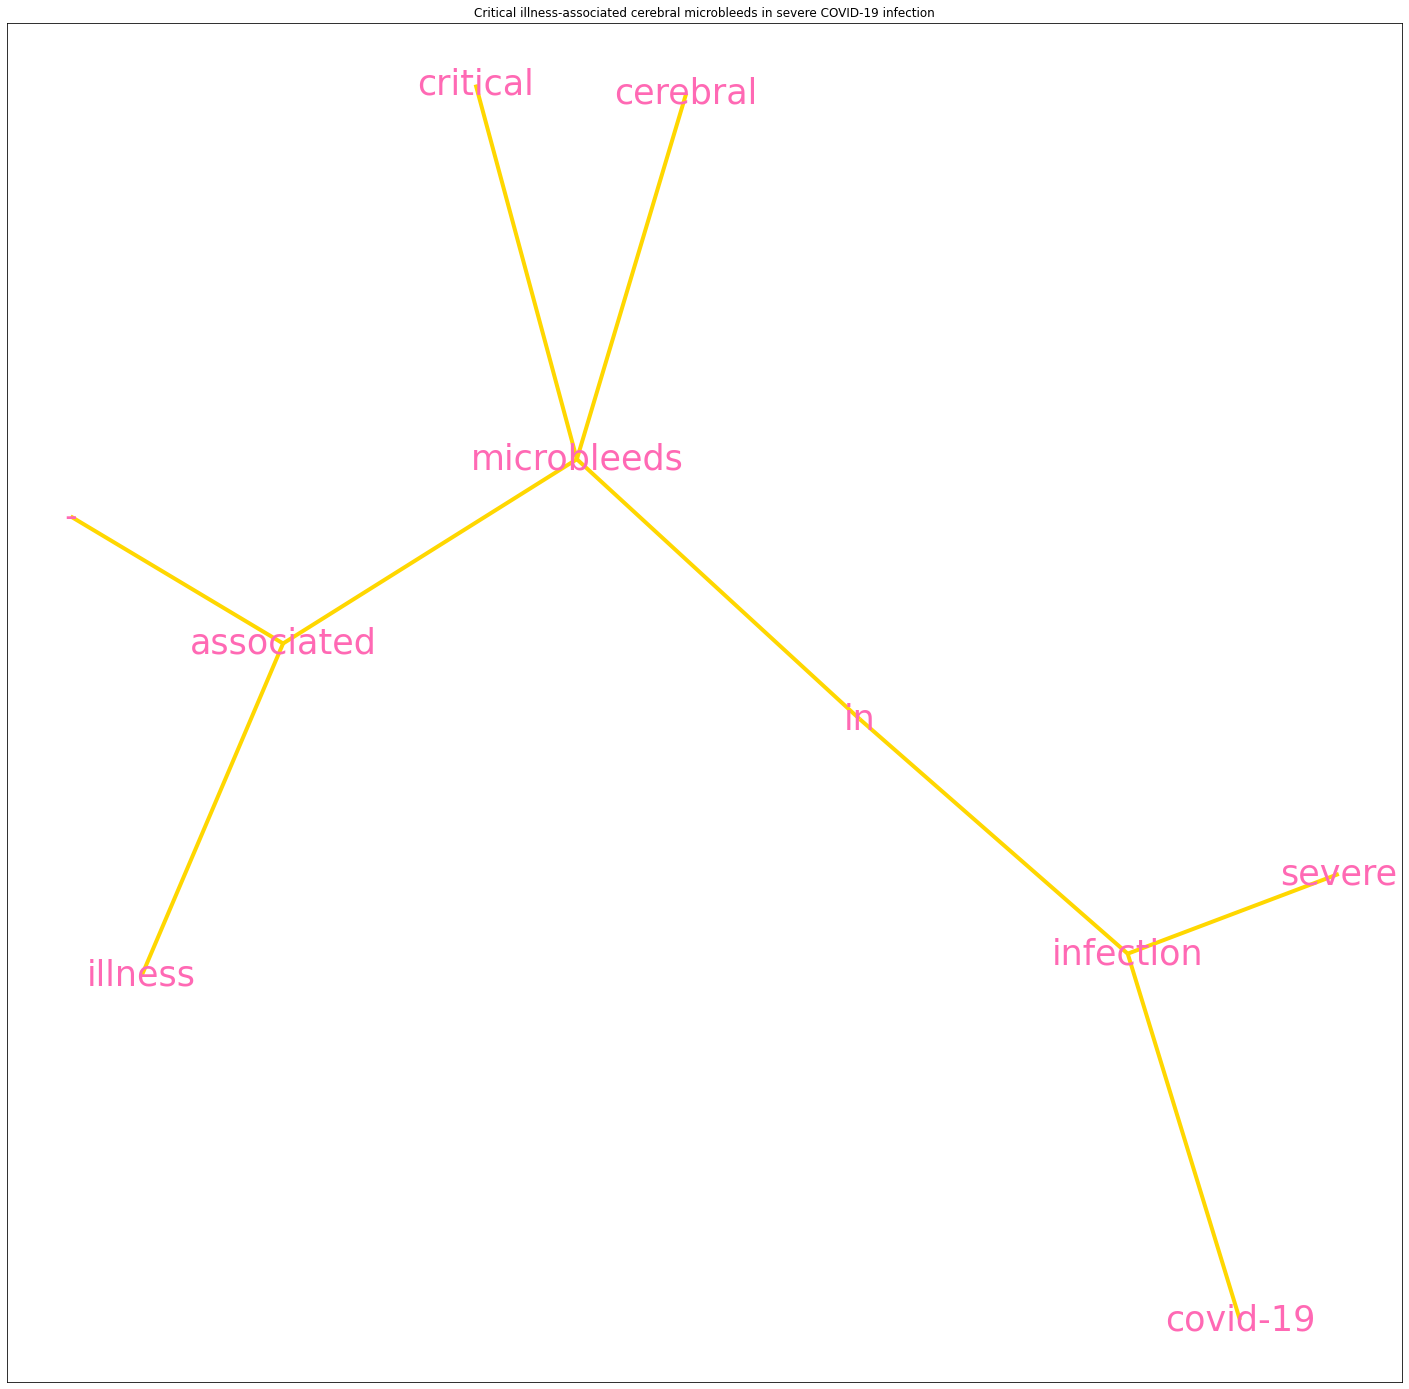

In [12]:
# 用图的形式把图给画出来
import matplotlib.pyplot as plt
edges=[]
for token in doc:
    for child in token.children:
        # print(token.lower_)
        # print(child.lower_)
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))
G =  nx.Graph(edges)
# 下面是计算两个给定实体间的距离
# entity1 = 'HeroZhang'.lower()
# entity2 = 'BinbinDong'.lower()
# print (nx.shortest_path_length (G , source=entity1 , target=entity2 ))
plt.figure(figsize=(25,25))
nx.draw_networkx(G, with_labels=True,
                 node_size=0, edge_color='gold',
                 font_color='hotpink',font_size=35,width=4)
plt.title(str1)
plt.savefig('title.png')
plt.show()
